In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import xarray as xr 
import glob
import numpy as np
import statsmodels.graphics.api as smg
from pandas import DataFrame
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
import eli5
from eli5.sklearn import PermutationImportance

# Independent variable

### Radiation

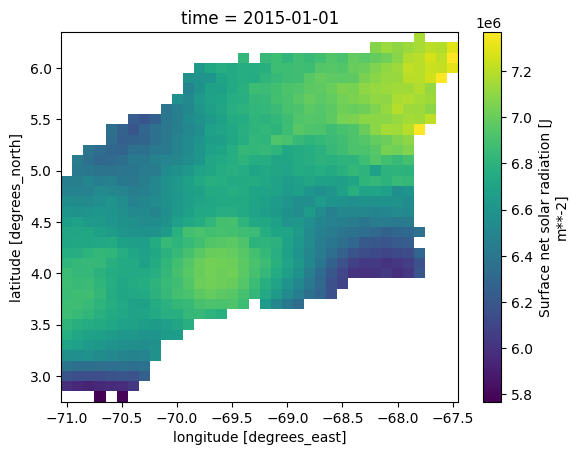

In [57]:
path='D:/user/Desktop/IA en Geo/Datos/Eras5/Netcdf final/Surface net solar radiationtotal.nc'
ssr=xr.open_dataset(path)
ssr_arr=ssr.ssr.values
ssr_vect=ssr_arr.ravel()
ssr_vect.shape

ssr.ssr[0].plot()

### Precipitation

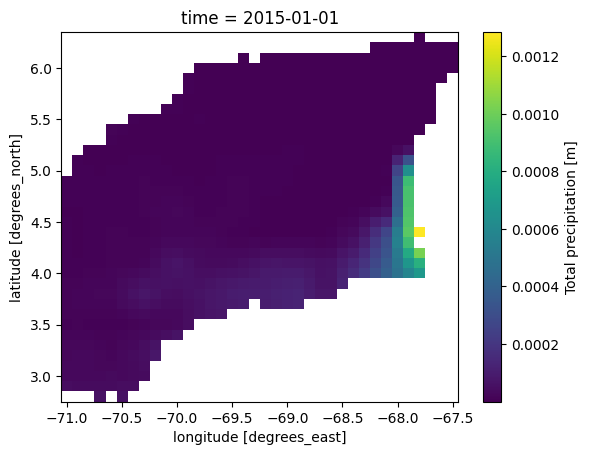

In [58]:
path='D:/user/Desktop/IA en Geo/Datos/Eras5/Netcdf final/Total precipitationtotal.nc'
tp=xr.open_dataset(path)
tp_arr=tp.tp.values
tp_vect=tp_arr.ravel()
tp_vect.shape
tp.tp[0].plot()

### Evaporation

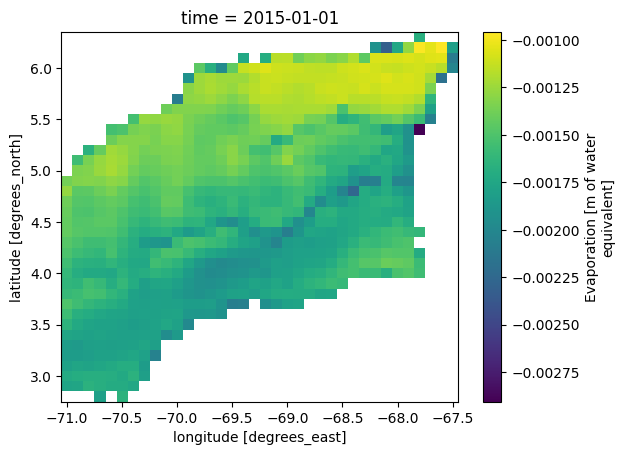

In [59]:
path='D:/user/Desktop/IA en Geo/Datos/Eras5/Netcdf final/Total evaporationtotal.nc'
e=xr.open_dataset(path)
e_arr=e.e.values
e_vect=e_arr.ravel()
# e_vect.shape
e.e[0].plot()

### Water soil

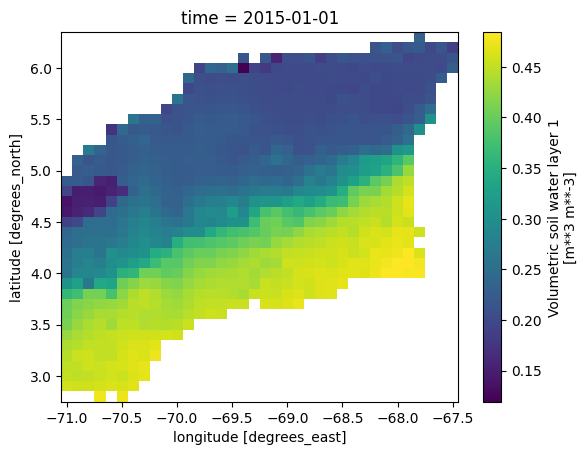

In [60]:
path='D:/user/Desktop/IA en Geo/Datos/Eras5/Netcdf final/Volumetric soil water layer 1total.nc'
swvl1=xr.open_dataset(path)
swvll1_arr=swvl1.swvl1.values
swvll1_vect=swvll1_arr.ravel()
# swvll1_vect.shape
swvl1.swvl1[0].plot()

### 2m temperature

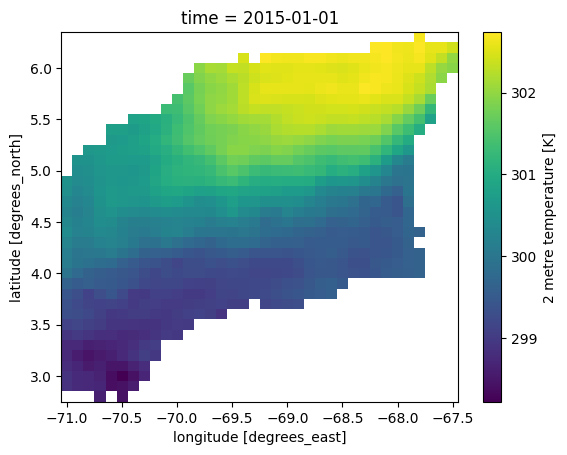

In [61]:
path='D:/user/Desktop/IA en Geo/Datos/Eras5/Netcdf final/2m temperaturetotal.nc'
t_2m=xr.open_dataset(path)
t_2m_arr=t_2m.t2m.values
t_2m_vect=t_2m_arr.ravel()
t_2m_vect.shape
t_2m.t2m[0].plot()

### Skin temperature

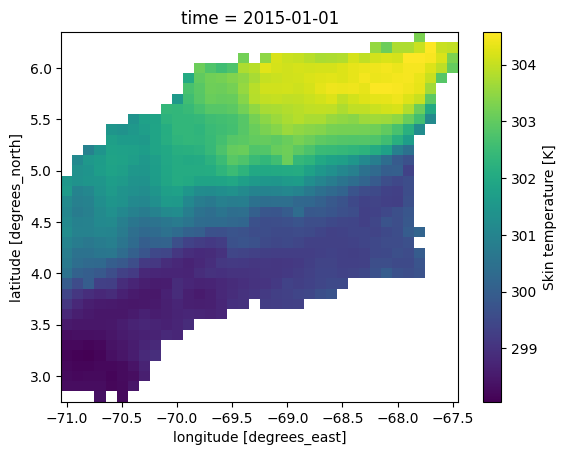

In [62]:
path='D:/user/Desktop/IA en Geo/Datos/Eras5/Netcdf final/Skin temperaturetotal.nc'
skt=xr.open_dataset(path)
skt_arr=skt.skt.values
skt_vect=skt_arr.ravel()
# skt_vect.shape
skt.skt[0].plot()

### Soil temperature level 1

In [63]:
path='D:/user/Desktop/IA en Geo/Datos/Eras5/Netcdf final/Soil temperature level 1total.nc'
stl1=xr.open_dataset(path)
stl1_arr=stl1.stl1.values
stl1_vect=stl1_arr.ravel()
stl1_vect.shape


(2366496,)

### Cover

In [64]:
path='D:/user/Desktop/IA en Geo/Shapes/Coberturas/Nc/Cover.nc'
cover=xr.open_dataset(path)
cov_arr=cover.Cover_land.values
cov_vect=cov_arr.ravel()
cov_vect.shape

(2366496,)

### Slope

In [65]:
path='D:/user/Desktop/IA en Geo/Shapes/slope/slop.nc'
slope=xr.open_dataset(path)
slope_arr=slope.slope.values
slope_vect=slope_arr.ravel()
slope_vect.shape

(2366496,)

# Dependent variable

In [66]:
path='D:/user/Desktop/IA en Geo/Datos/co2/final.nc'
co2=xr.open_dataset(path)
co2_arr=co2.co2fire.values
co2_vect=co2_arr.ravel()
co2_vect.shape

(2366496,)

In [67]:
path='D:/user/Desktop/IA en Geo/Datos/Fireburnedarea/Final/final.nc' 
burn=xr.open_dataset(path)
burn_arr=burn.LC.values
burn_vect=burn_arr.ravel()
burn_vect.shape

(2367792,)

# DataFrame

In [68]:
d={'Co2':co2_vect,'burn':burn_vect,'cover':cov_vect,'slope':slope_vect,'ev':e_vect,'pre':tp_vect,'rad':ssr_vect,'soilH':swvll1_vect,'2mT':t_2m_vect,'skinT':skt_vect,'soilT':stl1_vect}
df=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))

In [69]:
df1=df.dropna(subset=['cover','slope','ev','pre','rad','soilH','2mT','skinT','soilT']).reset_index(drop=True)
df1['burn']=df1['burn'].where(df1['burn']==0,1)
df1['burn'] = df1['burn'].fillna(0)
df1

,Co2,burn,cover,slope,ev,pre,rad,soilH,2mT,skinT,soilT
0,0.0,0.0,30.0,403.506470,-0.001678,1.490116e-08,7159174.500,0.232147,302.673950,303.265747,304.086884
1,0.0,0.0,30.0,250.003815,-0.001923,1.490116e-08,7073021.500,0.215638,302.712219,303.545258,304.516815
2,0.0,0.0,126.0,212.870575,-0.002313,1.490116e-08,7129897.500,0.228749,302.736877,303.119446,304.314850
3,0.0,0.0,30.0,866.940247,-0.001745,1.490116e-08,7096962.500,0.205990,302.646088,303.771332,304.633881
4,0.0,0.0,30.0,367.854095,-0.001276,1.490116e-08,7126602.000,0.218015,302.631744,303.769714,304.325470
...,...,...,...,...,...,...,...,...,...,...,...
1464447,0.0,1.0,112.0,2422.135742,-0.000619,2.609683e-03,1952757.625,0.492312,297.485596,297.330170,298.543304
1464448,0.0,1.0,112.0,2993.215088,-0.000628,2.271747e-03,1909936.125,0.457042,297.375519,297.074738,298.376221
1464449,0.0,1.0,112.0,4160.892578,-0.000651,1.880897e-03,1876406.000,0.461279,297.505005,297.252350,298.437195
1464450,0.0,1.0,112.0,5543.098145,-0.000586,2.303014e-03,1963665.125,0.465314,297.770630,297.690216,298.733337


In [70]:
df1['class']=np.where(((df1['burn']!=0) & (df1['Co2']!=0)),1,0)
df2=df1[['class','cover','slope','ev','pre','rad','soilH','2mT','skinT','soilT']]

In [71]:
df2.to_csv('D:/user/Desktop/IA en Geo/data.csv')

In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464452 entries, 0 to 1464451
Data columns (total 10 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   class   1464452 non-null  int32  
 1   cover   1464452 non-null  float32
 2   slope   1464452 non-null  float32
 3   ev      1464452 non-null  float32
 4   pre     1464452 non-null  float32
 5   rad     1464452 non-null  float32
 6   soilH   1464452 non-null  float32
 7   2mT     1464452 non-null  float32
 8   skinT   1464452 non-null  float32
 9   soilT   1464452 non-null  float32
dtypes: float32(9), int32(1)
memory usage: 55.9 MB


In [73]:
X=df2.drop(['class'],axis=1)
y=df1['class']

# Seleccion de variables

In [74]:
X_cont=X.drop(['cover'],axis=1)
print(X_cont.describe())

              slope            ev           pre           rad         soilH  \
count  1.464452e+06  1.464452e+06  1.464452e+06  1.464452e+06  1.464452e+06   
mean   1.031385e+03 -1.193178e-03  2.890391e-03  4.868485e+06  4.250695e-01   
std    7.613851e+02  2.881075e-04  3.689475e-03  1.219140e+06  8.758484e-02   
min    2.500038e+01 -3.252081e-03  0.000000e+00  6.792201e+05  1.090456e-01   
25%    5.199238e+02 -1.400304e-03  3.605963e-04  4.055627e+06  4.135273e-01   
50%    8.651341e+02 -1.193012e-03  1.702423e-03  4.989167e+06  4.651959e-01   
75%    1.325963e+03 -9.928957e-04  4.128778e-03  5.833512e+06  4.793004e-01   
max    6.327665e+03 -2.396791e-04  9.821168e-02  7.759692e+06  5.132327e-01   

                2mT         skinT         soilT  
count  1.464452e+06  1.464452e+06  1.464452e+06  
mean   2.963273e+02  2.971841e+02  2.977149e+02  
std    3.413448e+00  3.332343e+00  3.373380e+00  
min    2.951110e+02  2.948891e+02  2.957708e+02  
25%    2.983365e+02  2.986301e+02  2.9

In [75]:
y.value_counts()

0    1461487
1       2965
Name: class, dtype: int64

In [76]:
media=df1.groupby('class').mean()
print(media)

                Co2      burn      cover        slope        ev       pre  \
class                                                                       
0      6.747927e-12  0.967302  73.407005  1031.685547 -0.001193  0.002897   
1      1.105971e-07  1.000000  43.561550   763.505310 -0.001124  0.000583   

             rad     soilH         2mT       skinT       soilT  
class                                                           
0      4866620.0  0.424965  299.370758  299.900879  300.494537  
1      5731672.5  0.270554  301.624176  302.574310  303.231873  


In [77]:
selector = VarianceThreshold(threshold=0.1)
selector.fit(X)
print(selector.get_support())
X.columns[selector.get_support()]

[ True  True False False  True False  True  True  True]


Index(['cover', 'slope', 'rad', '2mT', 'skinT', 'soilT'], dtype='object')

In [78]:
# MatCorre=DataFrame(X.corr())
# smg.plot_corr(MatCorre, xnames=list(MatCorre.columns))

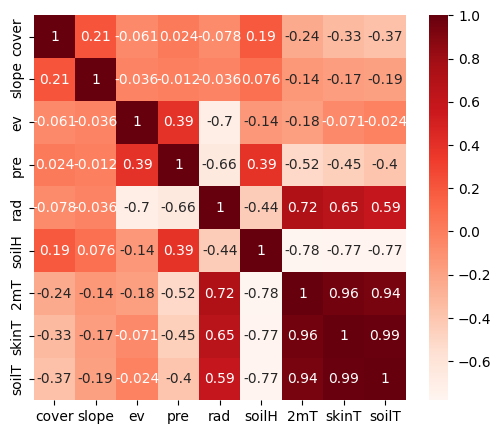

In [79]:
plt.figure(figsize=(6,5))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [80]:
X_cln=X.drop(['2mT','skinT'],axis=1)

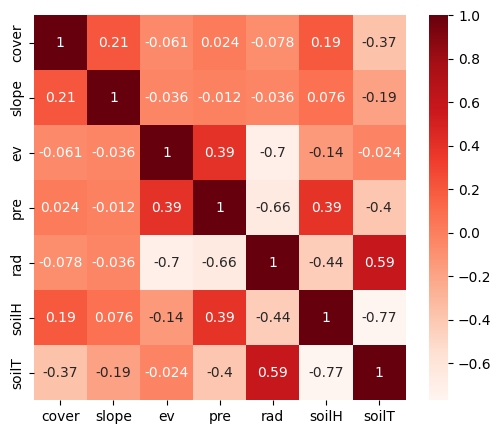

In [81]:
plt.figure(figsize=(6,5))
cor = X_cln.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

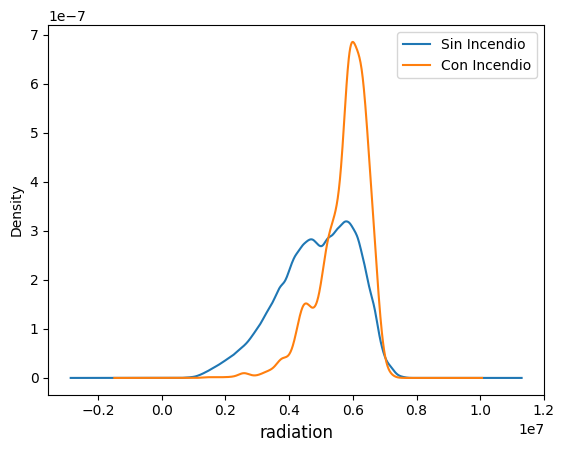

In [82]:
data_sin=df1[(df1['class']==0)]
data_con=df1[(df1['class']==1)]
fig, ax = plt.subplots()
data_sin['rad'].plot.kde(ax=ax, label='Sin Incendio')
data_con['rad'].plot.kde(ax=ax, label='Con Incendio')
# ax.set_xlim(0,90)
ax.set_xlabel('radiation', color='k', size=12)
# ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

In [83]:
len(X)

1464452

In [84]:
variables = SelectKBest(score_func=mutual_info_regression, k=8)
variables.fit(X,y)


SelectKBest(k=8,
            score_func=<function mutual_info_regression at 0x000002A7E3BB7520>)

In [85]:
X.columns[variables.get_support()]

Index(['cover', 'slope', 'pre', 'rad', 'soilH', '2mT', 'skinT', 'soilT'], dtype='object')

In [86]:
# variables.fit(X,y)
# print(variables.get_params)
# X.columns[variables.get_support()]